In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("C:/Users/makerofdreams/Downloads/assignment_data.csv")

In [3]:
data

,Molecule ChEMBL ID,Smiles,IC50
0,CHEMBL103307,O=C1Nc2ccccc2/C1=C\c1ccc(O)cc1,1800.0
1,CHEMBL602074,Cc1cc(C)c(/C=C2\C(=O)Nc3ccc(-c4cccnc4)cc32)[nH]1,2300.0
2,CHEMBL222728,Nc1n[nH]c2cccc(-c3ccc(NC(=O)Nc4cccc(Br)c4)cc3)c12,106.0
3,CHEMBL221053,CCc1cccc(NC(=O)Nc2ccc(-c3cccc4[nH]nc(N)c34)cc2)c1,55.0
4,CHEMBL1336,CNC(=O)c1cc(Oc2ccc(NC(=O)Nc3ccc(Cl)c(C(F)(F)F)...,58.0
...,...,...,...
2994,CHEMBL3814654,O=C1c2cc(-c3cn[nH]c3)ccc2-c2[nH]c3cc(-c4cn[nH]...,126.0
2995,CHEMBL3793933,CN(C)C(=O)c1ccc(NC(=O)c2n[nH]c3ccccc23)cc1,110.0
2996,CHEMBL5072454,COc1cc(N2CCCC2)ccc1NC(=O)c1cnn2ccc(N[C@@H]3CCC...,7.1
2997,CHEMBL5094510,O=C(Nc1ccc(N2CCOCC2)cc1)c1cnn2ccc(N[C@@H]3CCCN...,21.6


In [4]:
# data cleaning 
data.isna().sum()

Molecule ChEMBL ID    0
Smiles                0
IC50                  0
dtype: int64

In [5]:
data.shape

(2999, 3)

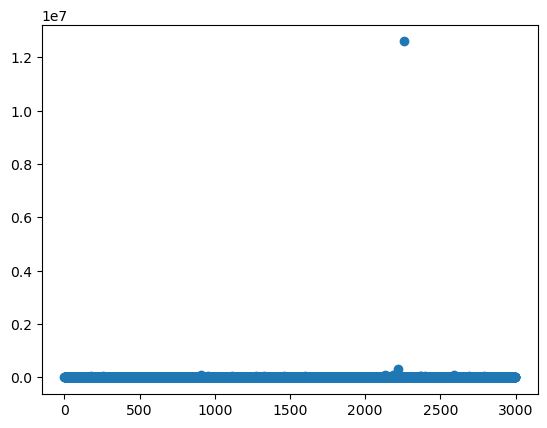

In [6]:
# this could be noted that this data actually has an outlier that can distub are prediction and that outlier is ambigous
# it is a very large value for ic50
y = data.IC50
x = data.index
plt.scatter(x,y)

In [7]:
# the outlier 
max(data.IC50)



12589254.12

In [8]:
# exercising the outlier out
data1 = data[data.IC50 != 12589254.12]

In [9]:
max(data1.IC50)

322000.0

In [10]:
data2 = data1[data1.IC50!=322000.0] 

In [11]:
data3=data2.reset_index()
data3

,index,Molecule ChEMBL ID,Smiles,IC50
0,0,CHEMBL103307,O=C1Nc2ccccc2/C1=C\c1ccc(O)cc1,1800.0
1,1,CHEMBL602074,Cc1cc(C)c(/C=C2\C(=O)Nc3ccc(-c4cccnc4)cc32)[nH]1,2300.0
2,2,CHEMBL222728,Nc1n[nH]c2cccc(-c3ccc(NC(=O)Nc4cccc(Br)c4)cc3)c12,106.0
3,3,CHEMBL221053,CCc1cccc(NC(=O)Nc2ccc(-c3cccc4[nH]nc(N)c34)cc2)c1,55.0
4,4,CHEMBL1336,CNC(=O)c1cc(Oc2ccc(NC(=O)Nc3ccc(Cl)c(C(F)(F)F)...,58.0
...,...,...,...,...
2992,2994,CHEMBL3814654,O=C1c2cc(-c3cn[nH]c3)ccc2-c2[nH]c3cc(-c4cn[nH]...,126.0
2993,2995,CHEMBL3793933,CN(C)C(=O)c1ccc(NC(=O)c2n[nH]c3ccccc23)cc1,110.0
2994,2996,CHEMBL5072454,COc1cc(N2CCCC2)ccc1NC(=O)c1cnn2ccc(N[C@@H]3CCC...,7.1
2995,2997,CHEMBL5094510,O=C(Nc1ccc(N2CCOCC2)cc1)c1cnn2ccc(N[C@@H]3CCCN...,21.6


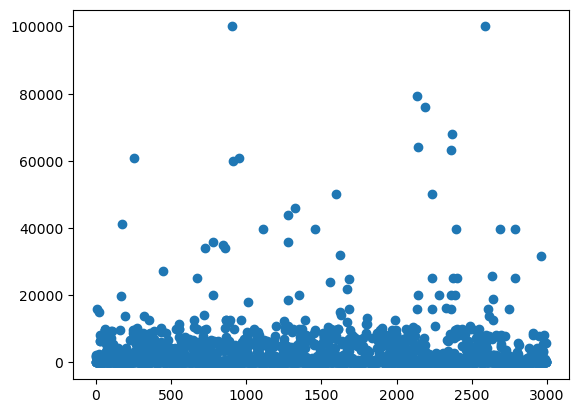

In [12]:
# checking the deletion
y = data3.IC50
x = data3.index
# data after cleaning
plt.scatter(x,y)

In [13]:
data3.describe()
# this can be that the data distribution is not good and it has high std 
#  to reduce it data normalization is required

,index,IC50
count,2997.000000,2997.000000
mean,1498.506840,1867.714129
std,865.959201,6004.030883
min,0.000000,0.015000
25%,749.000000,10.150000
50%,1498.000000,70.000000
75%,2248.000000,875.000000
max,2998.000000,100000.000000


In [ ]:
# data normalization
# adding more features to given data to make it more variable in training
# activity gives more variablity to close values of EC50 so that model would  train better 
data3["activity"]= np.log10(data3.IC50)

In [ ]:
plt.plot(data3.activity)

In [16]:
# std is reduced and change can be seen below
data2.describe()

,IC50,activity
count,2997.000000,2997.000000
mean,1867.714129,1.952226
std,6004.030883,1.257161
min,0.015000,-1.823909
25%,10.150000,1.006466
50%,70.000000,1.845098
75%,875.000000,2.942008
max,100000.000000,5.000000


In [17]:
data2.head()

,Molecule ChEMBL ID,Smiles,IC50,activity
0,CHEMBL103307,O=C1Nc2ccccc2/C1=C\c1ccc(O)cc1,1800.0,3.255273
1,CHEMBL602074,Cc1cc(C)c(/C=C2\C(=O)Nc3ccc(-c4cccnc4)cc32)[nH]1,2300.0,3.361728
2,CHEMBL222728,Nc1n[nH]c2cccc(-c3ccc(NC(=O)Nc4cccc(Br)c4)cc3)c12,106.0,2.025306
3,CHEMBL221053,CCc1cccc(NC(=O)Nc2ccc(-c3cccc4[nH]nc(N)c34)cc2)c1,55.0,1.740363
4,CHEMBL1336,CNC(=O)c1cc(Oc2ccc(NC(=O)Nc3ccc(Cl)c(C(F)(F)F)...,58.0,1.763428


In [18]:
import rdkit
from rdkit import Chem
from rdkit.Chem import Descriptors,rdMolDescriptors

In [19]:
molecule =[Chem.MolFromSmiles(smiles) for smiles in data2.Smiles]

In [20]:
morgan_fgs = [rdMolDescriptors.GetMorganFingerprintAsBitVect(mol,2,nBits = 1024) for mol in molecule]

In [21]:
x= np.array(morgan_fgs,dtype = float)
len(x)

2997

In [22]:
import sklearn
from sklearn.preprocessing import StandardScaler

In [23]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [24]:
x

array([[-0.02584143, -0.44694497, -0.2374818 , ..., -0.14414079,
        -0.14534222, -0.05173471],
       [-0.02584143, -0.44694497, -0.2374818 , ..., -0.14414079,
        -0.14534222, 19.32938178],
       [-0.02584143, -0.44694497, -0.2374818 , ..., -0.14414079,
        -0.14534222, -0.05173471],
       ...,
       [-0.02584143, -0.44694497, -0.2374818 , ...,  6.93766153,
        -0.14534222, -0.05173471],
       [-0.02584143, -0.44694497, -0.2374818 , ...,  6.93766153,
        -0.14534222, -0.05173471],
       [-0.02584143, -0.44694497, -0.2374818 , ...,  6.93766153,
        -0.14534222, -0.05173471]])

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [27]:
x_train, x_test, y_train, y_test=train_test_split(x,data2.activity,test_size=0.2)

In [37]:
# np.random.seed(100)
model = RandomForestRegressor(n_estimators = 1000, random_state=42)
model.fit(x_train, y_train)

    

RandomForestRegressor(n_estimators=1000, random_state=42)

In [38]:
y_pred = model.predict(x_test)


In [39]:
from sklearn.metrics import r2_score, mean_squared_error

In [40]:
r2_value = r2_score(y_test, y_pred)
r2_value

0.7075528993516726

In [41]:
mse = mean_squared_error(y_test,y_pred)
mse

0.47855223756017995

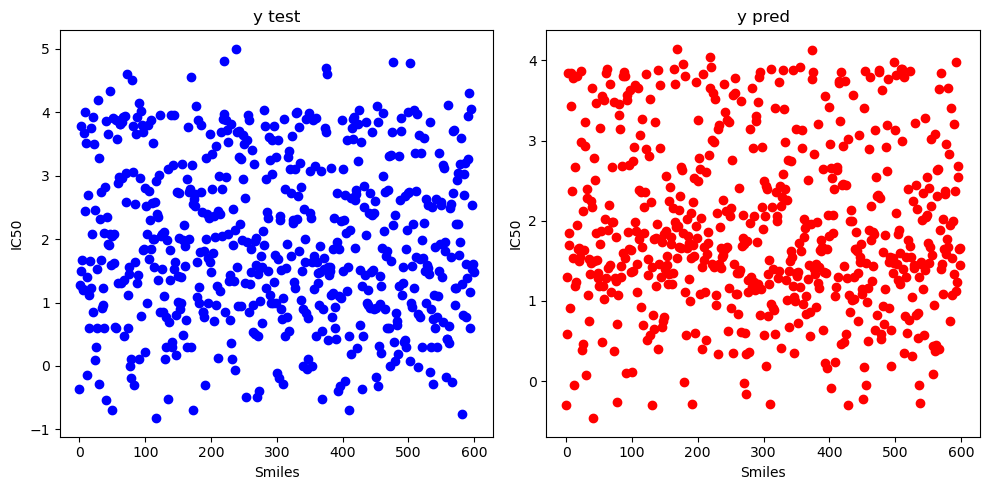

In [42]:
# comparsion of test and prediction
import matplotlib.pyplot as plt


x1 = np.arange(len(y_test))
y1 = y_test


x2 = np.arange(len(y_pred))
y2 = y_pred


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))


ax1.scatter(x1, y1, color='blue', label='Plot 1')
ax1.set_title('y test')
ax1.set_xlabel('Smiles')
ax1.set_ylabel('IC50')

ax2.scatter(x2, y2, color='red', label='Plot 2')
ax2.set_title('y pred')
ax2.set_xlabel('Smiles')
ax2.set_ylabel('IC50')


plt.tight_layout()


plt.show()
